In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
L=1
nx=51
dx=L/(nx-1)
alpha=1.22e-3
q=0#temperaature gradient on right side
x=numpy.linspace(0,L,num=nx)
T0=numpy.zeros(nx)
T0[0]=100


In [3]:
from scipy import linalg

In [4]:
def lhs(N,sigma):
    D=numpy.diag((2+1/sigma)*numpy.ones(N))
    D[-1,-1]=1+1/sigma
    U=numpy.diag(-1*numpy.ones(N-1),k=1)
    L=numpy.diag(-1*numpy.ones(N-1),k=-1)
    A=D+U+L
    return A

In [5]:
def rhs(T,sigma,qdx):
    b=T[1:-1]/sigma
    b[0]+=T[0]
    b[-1]+=qdx
    return b

In [6]:
def btcs_implicit(T0,sigma,alpha,nt,dt,dx,q):
    sigma=alpha*dt/dx**2
    A=lhs(len(T0)-2,sigma)
    T=T0.copy()
    for n in range(nt):
        b=rhs(T,sigma,q*dx)
        T[1:-1]=numpy.linalg.solve(A,b)
        T[-1]=T[-2]+q*dx
    return T
        

In [7]:
sigma=1
dt=sigma*dx**2/alpha
nt=1000
T=btcs_implicit(T0,sigma,alpha,nt,dt,dx,q)


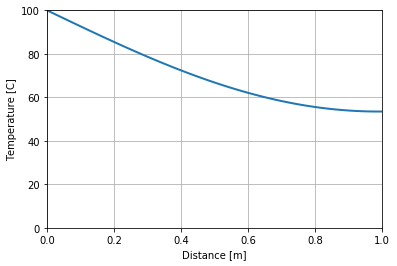

In [8]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);
